In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("wasserwerte_filled.csv", on_bad_lines='skip', sep=';')
selected_data = data[["Wassertemperatur", "pH-Wert", "Leitfaehigkeit"]].to_numpy()
labels = data["Sauerstoff-Gehalt"].to_numpy()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(selected_data, labels, test_size=0.2, random_state=42)
print(x_train.shape)

(857, 3)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])

In [12]:
history = model.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
27/27 [==============================] - 0s 4ms/step - loss: 8.8093 - mae: 2.3572 - val_loss: 8.2381 - val_mae: 2.2212
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 8.8100 - mae: 2.3570 - val_loss: 8.2380 - val_mae: 2.2208
Epoch 3/300
27/27 [==============================] - 0s 2ms/step - loss: 8.8088 - mae: 2.3569 - val_loss: 8.2378 - val_mae: 2.2203
Epoch 4/300
27/27 [==============================] - 0s 2ms/step - loss: 8.8109 - mae: 2.3579 - val_loss: 8.2378 - val_mae: 2.2213
Epoch 5/300
27/27 [==============================] - 0s 2ms/step - loss: 8.8082 - mae: 2.3569 - val_loss: 8.2376 - val_mae: 2.2206
Epoch 6/300
27/27 [==============================] - 0s 2ms/step - loss: 8.8086 - mae: 2.3568 - val_loss: 8.2374 - val_mae: 2.2201
Epoch 7/300
27/27 [==============================] - 0s 2ms/step - loss: 8.8086 - mae: 2.3565 - val_loss: 8.2373 - val_mae: 2.2196
Epoch 8/300
27/27 [==============================] - 0s 2ms/step - loss: 8.8095 - m

In [13]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Loss: {loss}, MAE: {mae}")

7/7 [==============================] - 0s 1ms/step - loss: 7.8726 - mae: 2.1418
Loss: 7.872596263885498, MAE: 2.141767978668213


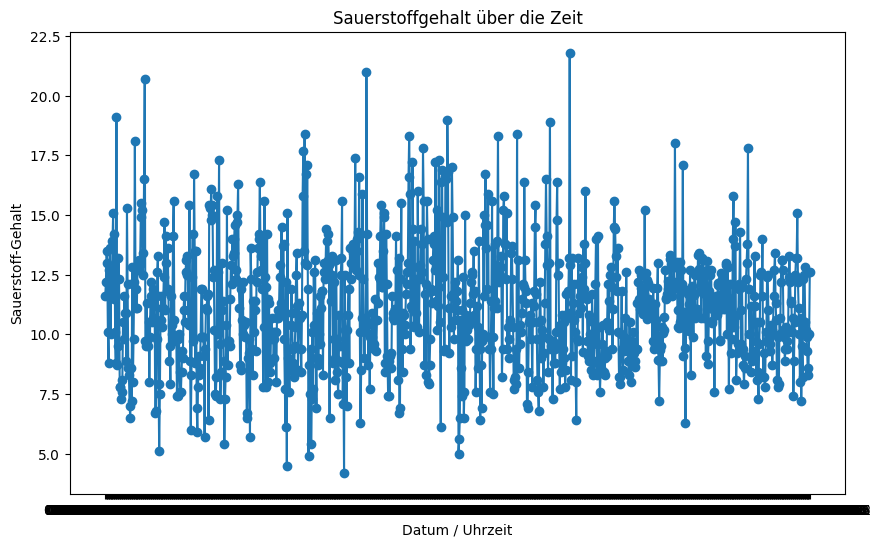

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Daten laden
data = pd.read_csv("wasserwerte_filled.csv", on_bad_lines='skip', sep=';')


# Sauerstoff-Gehalt und Datum/Uhrzeit extrahieren
sauerstoff_gehalt = data["Sauerstoff-Gehalt"]
datum_uhrzeit = data["Datum / Uhrzeit"]

# Plot erstellen
plt.figure(figsize=(10,6))
plt.plot_date(datum_uhrzeit, sauerstoff_gehalt, linestyle='solid')

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Sauerstoffgehalt über die Zeit')
plt.xlabel('Datum / Uhrzeit')
plt.ylabel('Sauerstoff-Gehalt')

# Diagramm anzeigen
plt.show()

In [19]:
# Eingabedaten erstellen
input_data = np.array([[5, 7, 700]])  # 5 Grad Temperatur, pH 7, Leitfähigkeit 700

# Vorhersage machen
prediction = model.predict(input_data)

# Vorhersage ausgeben
print("Vorhergesagter Sauerstoffgehalt: ", prediction[0][0])

1/1 [==============================] - 0s 237ms/step
Vorhergesagter Sauerstoffgehalt:  11.066514


In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()


Num GPUs Available:  0


False